In [2]:
# import pacakges
import pandas as pd
import numpy as np
import igraph as ig
import seaborn as sns
from statistics import mean, median, stdev
from matplotlib.pyplot import subplots
import itertools

In [14]:
regulome_network_edges = pd.read_csv('./files/human_regulome.gz', compression='infer')
# Create network objeect in iGraph
regulome_network_graph = ig.Graph.DataFrame(regulome_network_edges, directed=True, use_vids = False)

**Network Properties**

In [15]:
# save path_lengths, but already in files
# Only run if recalculating distances!!!!!!

# path_lengths = regulome_network_graph.distances(source=None, target=None, weights='5:PPV', mode='all', algorithm='Djikstra') 

# path_lengths = list(itertools.chain.from_iterable(path_lengths))
# path_lengths.remove(0.0)
# path_lengths_df = pd.DataFrame(data=path_lengths, dtype=np.float32)
# del path_lengths
# path_lengths_df.to_pickle(path='./files/path_lengths.gz', compression='infer')

<bound method NDFrame.head of         ProteinAid  ProteinBid   PPV  LLR_GRG
0           349606      334435  1.00    0.243
1           346216      335411  1.00    0.910
2           351136      346216  1.00    0.217
3           340227      338814  1.00    1.332
4           346216      339117  1.00    1.264
...            ...         ...   ...      ...
501715      350619      333922  0.85    0.084
501716      336100      335579  0.85    0.032
501717      349802      344930  0.85    0.094
501718      349606      344142  0.85    0.136
501719      351128      334416  0.85    0.114

[501720 rows x 4 columns]>

In [16]:
TFs = set(regulome_network_edges['ProteinAid'])
targets = set(regulome_network_edges['ProteinBid'])
non_TF_targets = targets - TFs

degree_distr = regulome_network_graph.degree(mode='all', loops=False)

avglocal_clusteringcoeff = regulome_network_graph.transitivity_avglocal_undirected(mode='zero', weights='PPV') # Ask which mode to use - nan or zero?
global_clusteringcoeff = regulome_network_graph.transitivity_undirected(mode='nan')

path_lengths_df = pd.read_pickle(filepath_or_buffer='./files/path_lengths.gz', compression='infer')

In [14]:
print(f"Number of TFs: {len(TFs)}")
print(f"Number of targets: {len(targets)}")
print(f"Number of non-TF targets: {len(non_TF_targets)}")
 
# Degree distributions
print(f"mean degree: {mean(degree_distr)}"
      f"\nmedian degree: {median(degree_distr)}"
      f"\nsd degree: {stdev(degree_distr)}" # several nodes with high degree pushing sd up
      f"\nhighest degree: {max(degree_distr)}"
      f"\nlowest degree: {min(degree_distr)}") # some outliers there with a shit ton of connections

# CLustering Coefficients
print(f"\nClustering Coefficients:"
      f"\nAverage local: {avglocal_clusteringcoeff}"
      f"\nGlobal: {global_clusteringcoeff}")
# slarge average but small global coefficient. Will generate many smaller clusters? 
# few connections between TF-target groups?

# Path lengths
print(f"\nPath lengths:"
      f"\nAverage: {round(path_lengths_df[0].mean(), 1)}"
      f"\nDiameter (longest): {path_lengths_df[0].max()}")


Number of TFs: 873
Number of targets: 15018
Number of non-TF targets: 14168
mean degree: 66.71364935842031
median degree: 20
sd degree: 287.20854395125997
highest degree: 7540
lowest degree: 1

Clustering Coefficients:
Average local: 0.6297289104155881
Global: 0.05442507819727473

Path lengths:
Average: 2.0
Diameter (longest): 6.034999847412109


Text(0.5, 1.0, 'path lengths')

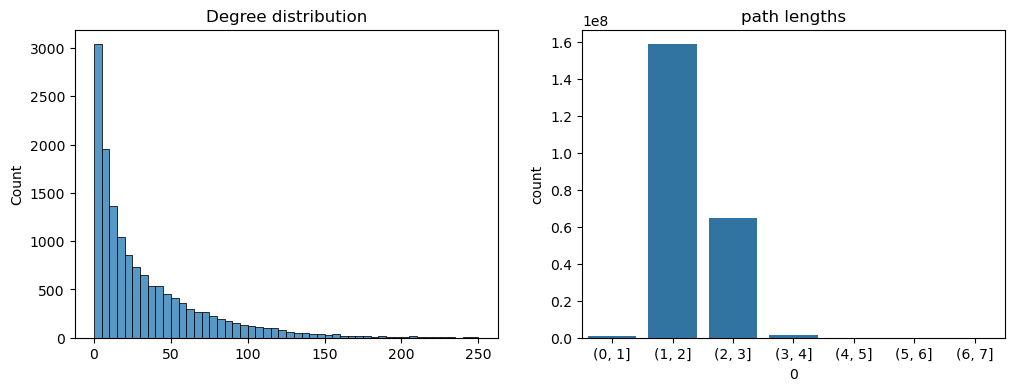

In [9]:
fig, axes = subplots(1,2, figsize=(12,4))
sns.histplot(degree_distr, binwidth=5,
            binrange=(0,250),
            ax=axes[0]).set_title("Degree distribution") # power distribution

path_length_bins = pd.cut(path_lengths_df[0], bins=range(0,8)).value_counts()
sns.barplot(path_length_bins,
             ax=axes[1]).set_title("path lengths")


In [ ]:
# visualize small portion of network for protein P20226

mask = regulome_network_edges['0:ProteinA'].isin(['P20226', 'Q16254'])

P20226_network = regulome_network_edges[mask]
P20226_network = P20226_network[regulome_network_edges['5:PPV'] > 0.99]
P20226_network_graph = ig.Graph.DataFrame(P20226_network, directed=True, use_vids = False)
P20226_network_graph.summary()

labels = P20226_network_graph.vs['name']

ig.plot(P20226_network_graph, vertex_label=labels)



In [ ]:
# for fun - identify some highyly connected targets

# degree of all targets
target_degrees = regulome_network_edges['1:ProteinB'].value_counts()
highest_degree_target = target_degrees.axes[0].to_list()[0]

shared_Q8IV63 = regulome_network_graph.induced_subgraph(regulome_network_graph.neighborhood(vertices=highest_degree_target, order=2, mode='all'))
ig.plot(shared_Q8IV63)